In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import seaborn as sns

In [3]:
#importing the files as csv
from google.colab import files
uploaded = files.upload()

Saving frozen vegetables.csv to frozen vegetables.csv


In [8]:
#reading in the datasets
df2 = pd.read_csv('frozen vegetables.csv')

In [9]:
#for ts analysis
df2_ts = df2.copy()

In [10]:
df2_new = df2.copy()

In [7]:
#reading first 5 rows of df2
df2.head()

,REGION,WEEK ENDING,UPC,CATEGORY,PARENT,MANUFACTURER,BRAND,MAJOR BRAND,PRIVATE LABEL/NATIONAL,PRODUCT DESCRIPTION,PRODUCT TYPE,PACKAGING GROUP,FLAVOR/SCENT,UNITS,DOLLARS
0,1,24-06-2018,14854986338,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 68,BRUSSEL SPROUT,BAG,ALL OTHER FLAVOR/SCENT,287,285.53
1,1,01-07-2018,14854989442,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 1610,SPINACH,BOX,ALL OTHER FLAVOR/SCENT,7,8.19
2,2,02-06-2019,14854986981,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 389,MIXED VEGETABLE,BAG,ASIAN,168,166.32
3,4,10-11-2019,14854986552,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 171,BROCCOLI,BAG,ALL OTHER FLAVOR/SCENT,35,85.05
4,3,17-11-2019,14854987949,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 876,PEAS,BAG,ALL OTHER FLAVOR/SCENT,14,50.26


In [11]:
#for analysis during covid
df2_analysis_during = df2_new.copy()

In [12]:
#for analysis before covid
df2_analysis_before = df2_new.copy()

**OVER THE ENTIRE PERIOD**

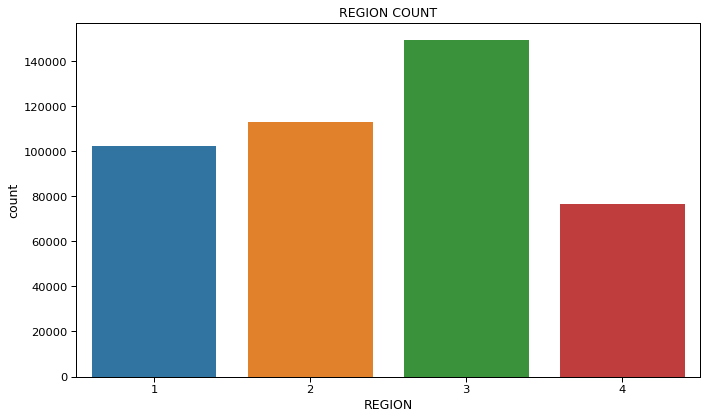

In [13]:
#plotting a seaborn map to see 'Region' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df2,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

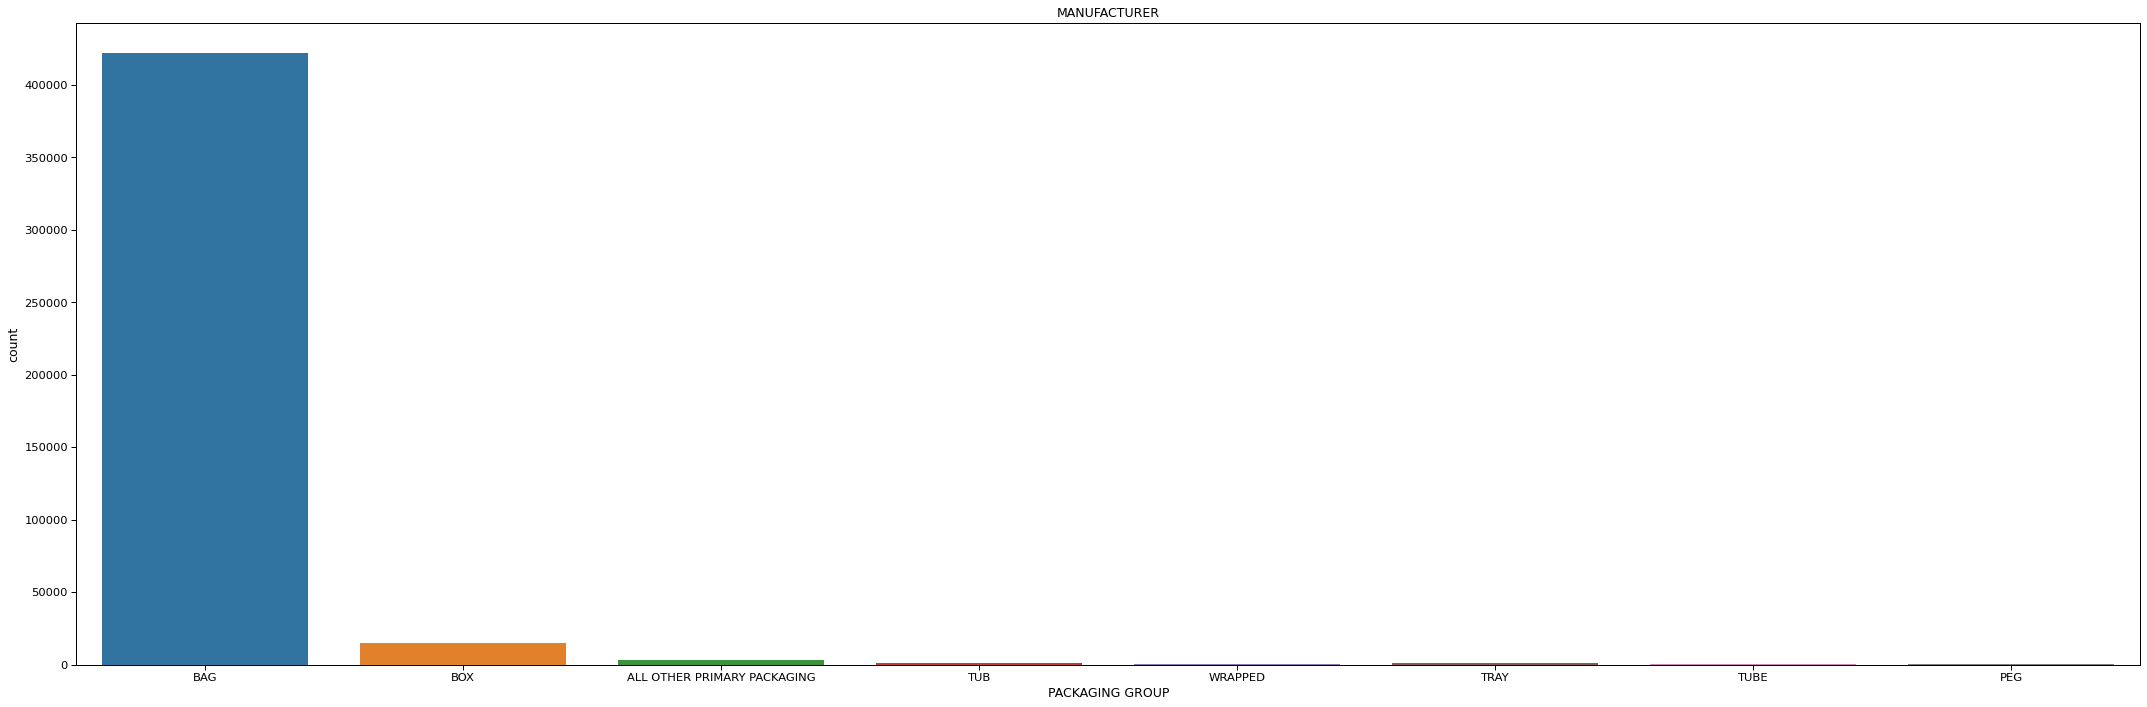

In [14]:
#plotting a seaborn map to see 'Packaging group' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df2,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

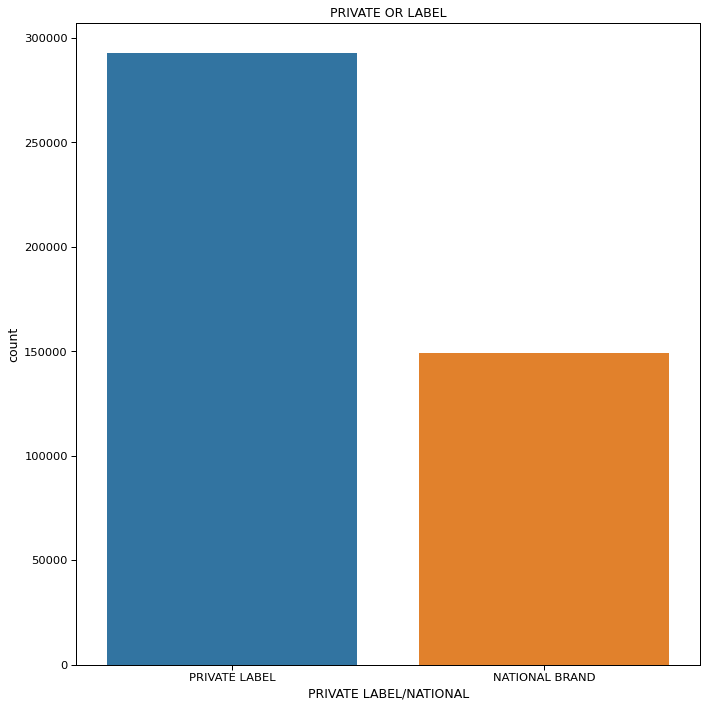

In [15]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df2,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

In [16]:
df2['WEEK ENDING'] = pd.to_datetime(df2['WEEK ENDING'])
#df2['WEEK ENDING'] = pd.to_datetime(df2['WEEK ENDING'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f55f091fa10>,
      dtype=object)

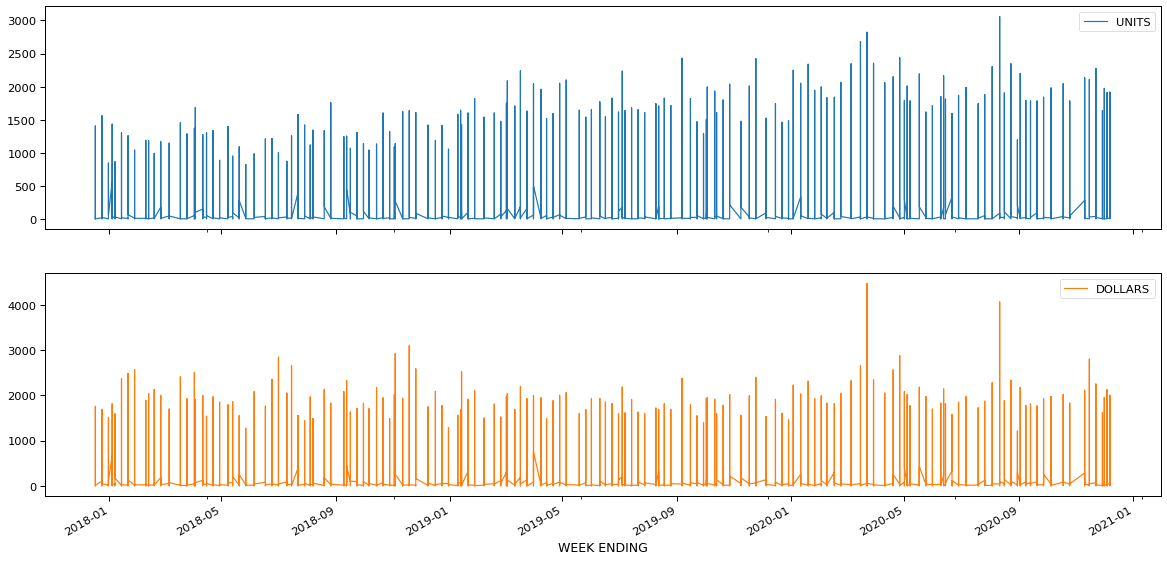

In [17]:
df2 = df2.set_index('WEEK ENDING')
df2_plot = df2[['UNITS','DOLLARS']]
df2_plot.plot(subplots=True,figsize=(20,10))

**BEFORE COVID**

In [18]:
#before covid time - CHECKING how the categorical
df2_analysis_before['WEEK ENDING'] = pd.to_datetime(df2_analysis_before['WEEK ENDING'])
date_frame_analysis_before = df2_analysis_before.set_index('WEEK ENDING')
df_covid_analysis_before = date_frame_analysis_before[(date_frame_analysis_before.index > '2017-12-17') & (date_frame_analysis_before.index <= '2020-03-13')]

In [19]:
#count before covid period
df_covid_analysis_before.count()

REGION                    328931
UPC                       328931
CATEGORY                  328931
PARENT                    328931
MANUFACTURER              328931
BRAND                     328931
MAJOR BRAND               328931
PRIVATE LABEL/NATIONAL    328931
PRODUCT DESCRIPTION       328931
PRODUCT TYPE              328931
PACKAGING GROUP           328931
FLAVOR/SCENT              328931
UNITS                     328931
DOLLARS                   328931
dtype: int64

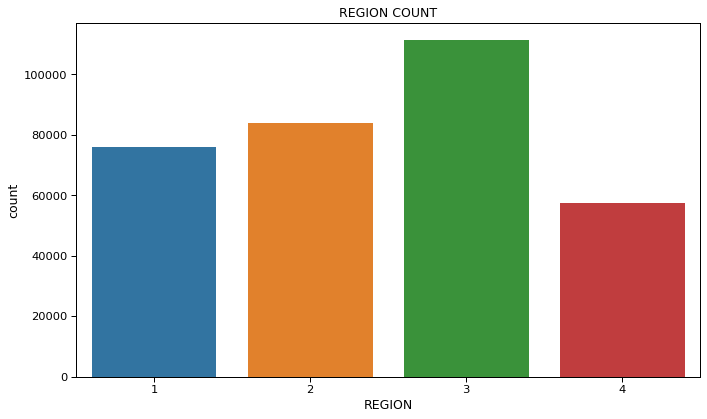

In [20]:
#plotting a seaborn map to see 'Region' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df_covid_analysis_before,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

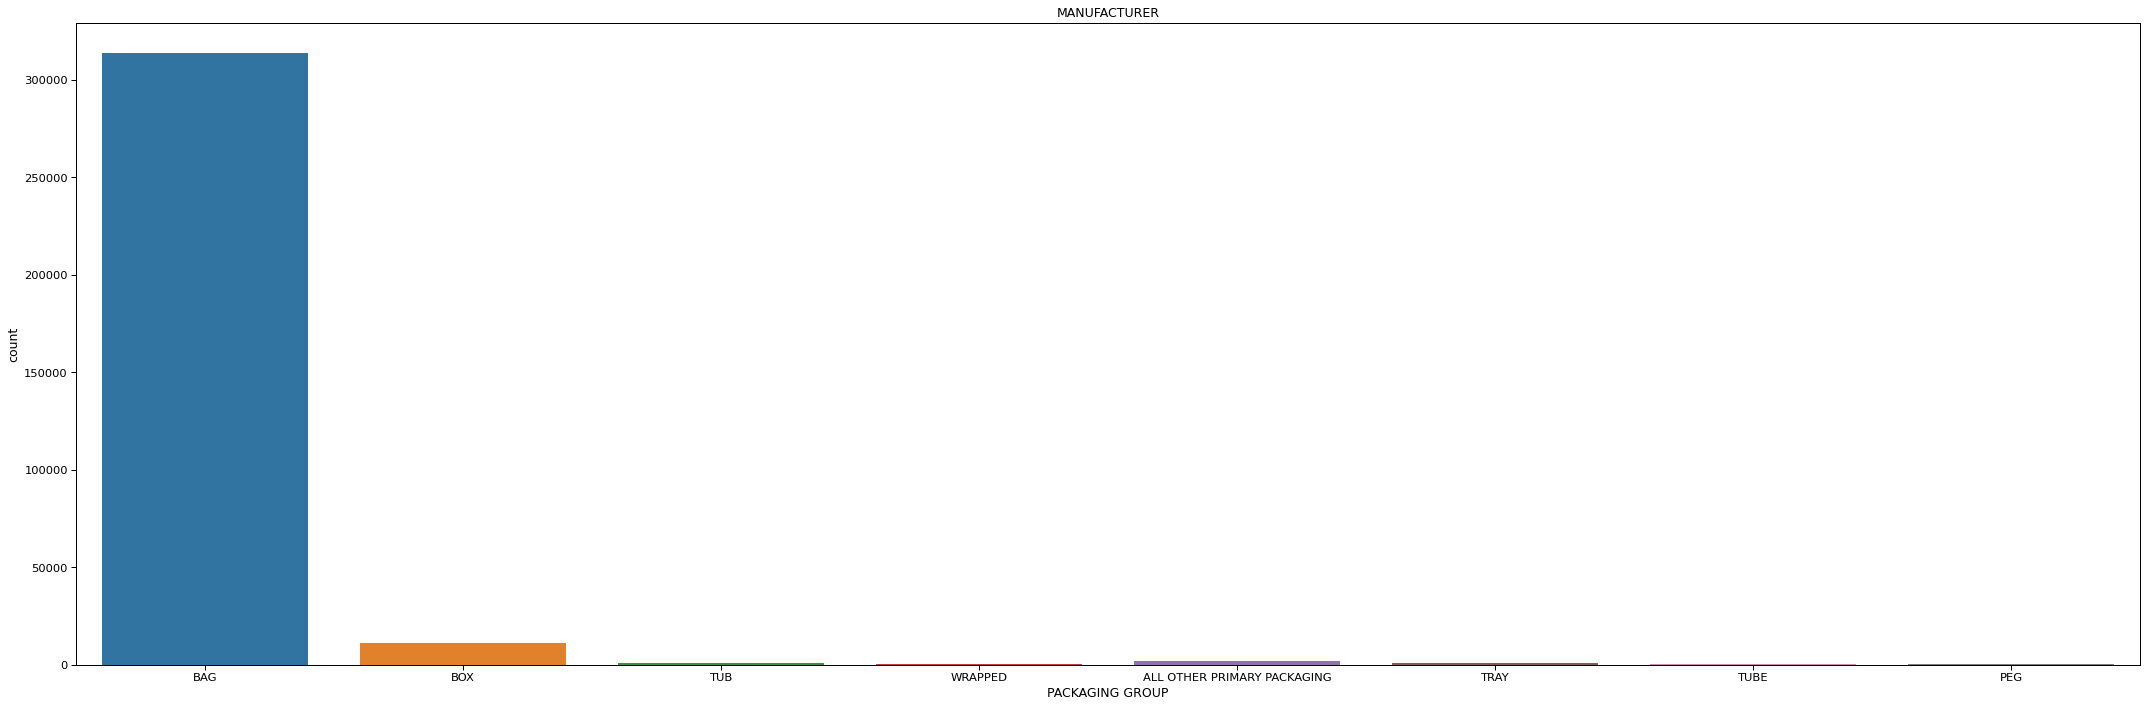

In [21]:
#plotting a seaborn map to see 'Packaging group' distribution - before covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df_covid_analysis_before,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

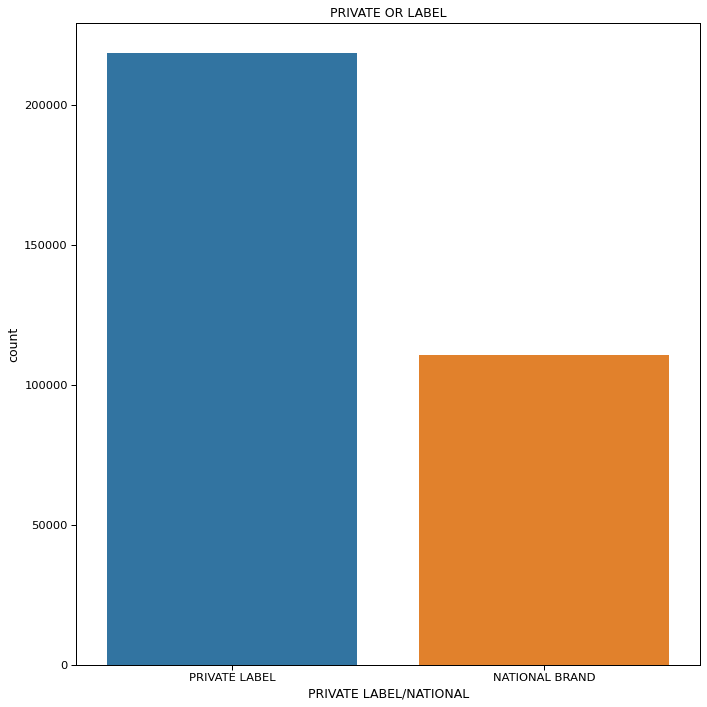

In [22]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - before covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df_covid_analysis_before,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

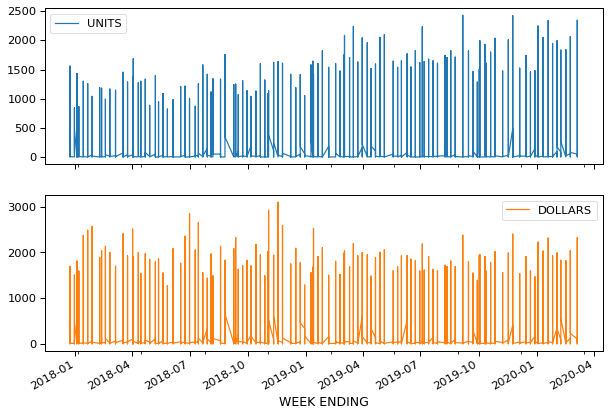

In [23]:
df_covid_plot= df_covid_analysis_before[['UNITS','DOLLARS']]
df_covid_plot.plot(subplots=True,figsize=(10,7));

**DURING COVID**

In [24]:
#during covid time - CHECKING how the categorical
df2_analysis_during['WEEK ENDING'] = pd.to_datetime(df2_analysis_during['WEEK ENDING'])
date_frame_analysis_during = df2_analysis_during.set_index('WEEK ENDING')
df_covid_analysis_during = date_frame_analysis_during[(date_frame_analysis_during.index > '2020-03-14') & (date_frame_analysis_during.index <= '2020-12-06')]

In [25]:
#count during covid period
df_covid_analysis_during.count()

REGION                    107346
UPC                       107346
CATEGORY                  107346
PARENT                    107346
MANUFACTURER              107346
BRAND                     107346
MAJOR BRAND               107346
PRIVATE LABEL/NATIONAL    107346
PRODUCT DESCRIPTION       107346
PRODUCT TYPE              107346
PACKAGING GROUP           107346
FLAVOR/SCENT              107346
UNITS                     107346
DOLLARS                   107346
dtype: int64

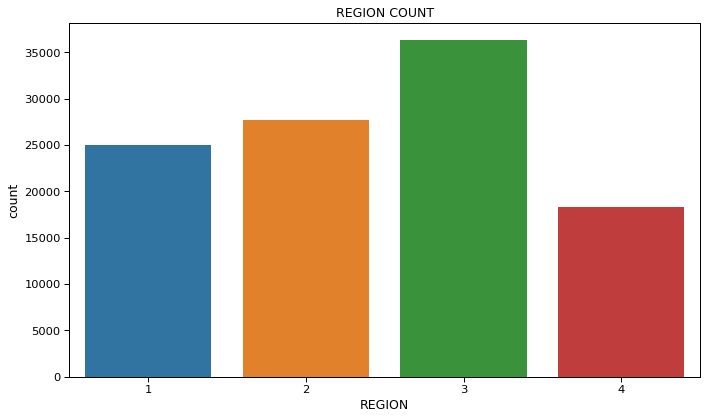

In [26]:
#plotting a seaborn map to see 'Region' distribution - during covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=df_covid_analysis_during,x='REGION')
ax.set_title('REGION COUNT')
plt.tight_layout()
plt.show()

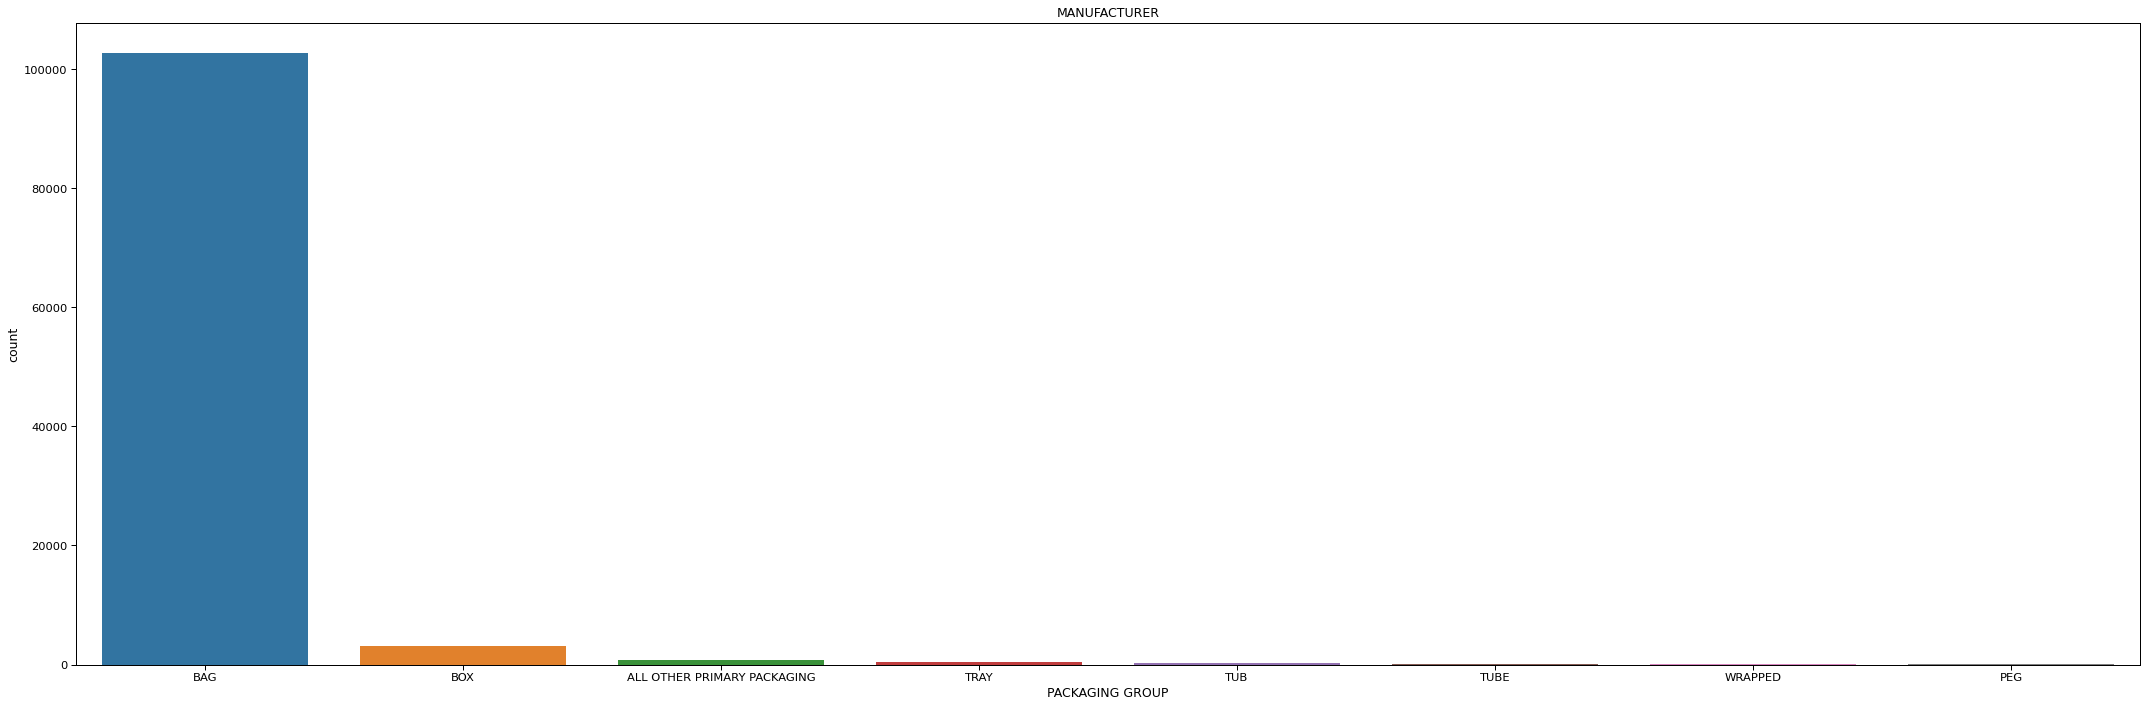

In [27]:
#plotting a seaborn map to see 'Packaging group' distribution - covid period
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df_covid_analysis_during,x='PACKAGING GROUP')
ax.set_title('MANUFACTURER')
plt.tight_layout()
plt.show()

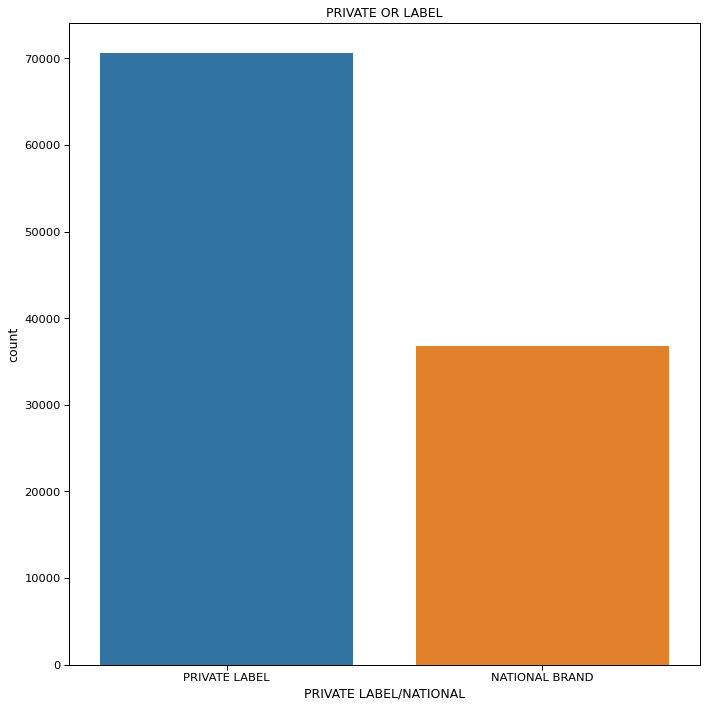

In [28]:
#plotting a seaborn map to see 'PRIVATE LABEL/NATIONAL' distribution - covid time
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.countplot(data=df_covid_analysis_during,x='PRIVATE LABEL/NATIONAL')
ax.set_title('PRIVATE OR LABEL')
plt.tight_layout()
plt.show()

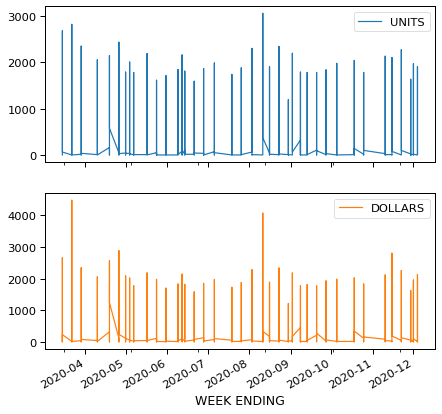

In [29]:
df_covid_plot= df_covid_analysis_during[['UNITS','DOLLARS']]
df_covid_plot.plot(subplots=True,figsize=(7,7));

**GENERAL ANALYSIS**

In [30]:
print(df2.shape)
print(df2.columns)
print(df2.isnull().any())
print(df2.nunique())

(441792, 14)
Index(['REGION', 'UPC', 'CATEGORY', 'PARENT', 'MANUFACTURER', 'BRAND',
       'MAJOR BRAND', 'PRIVATE LABEL/NATIONAL', 'PRODUCT DESCRIPTION',
       'PRODUCT TYPE', 'PACKAGING GROUP', 'FLAVOR/SCENT', 'UNITS', 'DOLLARS'],
      dtype='object')
REGION                    False
UPC                       False
CATEGORY                  False
PARENT                    False
MANUFACTURER              False
BRAND                     False
MAJOR BRAND               False
PRIVATE LABEL/NATIONAL    False
PRODUCT DESCRIPTION       False
PRODUCT TYPE              False
PACKAGING GROUP           False
FLAVOR/SCENT              False
UNITS                     False
DOLLARS                   False
dtype: bool
REGION                        4
UPC                        5683
CATEGORY                      1
PARENT                      203
MANUFACTURER                207
BRAND                       282
MAJOR BRAND                 222
PRIVATE LABEL/NATIONAL        2
PRODUCT DESCRIPTION        5

In [31]:
df2.describe()

,REGION,UPC,UNITS,DOLLARS
count,441792.000000,4.417920e+05,441792.000000,441792.000000
mean,2.454795,1.485499e+10,39.763651,66.860502
std,1.028765,2.219978e+03,79.931957,110.513245
min,1.000000,1.485499e+10,7.000000,0.000000
25%,2.000000,1.485499e+10,7.000000,15.960000
50%,3.000000,1.485499e+10,14.000000,31.150000
75%,3.000000,1.485499e+10,35.000000,69.160000
max,4.000000,1.485500e+10,3059.000000,4476.850000


In [32]:
df2_new.head()

,REGION,WEEK ENDING,UPC,CATEGORY,PARENT,MANUFACTURER,BRAND,MAJOR BRAND,PRIVATE LABEL/NATIONAL,PRODUCT DESCRIPTION,PRODUCT TYPE,PACKAGING GROUP,FLAVOR/SCENT,UNITS,DOLLARS
0,1,24-06-2018,14854986338,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 68,BRUSSEL SPROUT,BAG,ALL OTHER FLAVOR/SCENT,287,285.53
1,1,01-07-2018,14854989442,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 1610,SPINACH,BOX,ALL OTHER FLAVOR/SCENT,7,8.19
2,2,02-06-2019,14854986981,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 389,MIXED VEGETABLE,BAG,ASIAN,168,166.32
3,4,10-11-2019,14854986552,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 171,BROCCOLI,BAG,ALL OTHER FLAVOR/SCENT,35,85.05
4,3,17-11-2019,14854987949,PLAIN VEGETABLES - FZ,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRIVATE LABEL,PRODUCT 876,PEAS,BAG,ALL OTHER FLAVOR/SCENT,14,50.26


In [33]:
#we will be dropping this column and we wont be taking this our prediction
df2_new['UPC'].value_counts()

14854986724    624
14854986267    624
14854986225    624
14854986233    624
14854986785    624
14854986662    624
14854986534    624
14854986224    624
14854986324    624
14854986285    624
14854986440    624
14854986309    624
14854986417    624
14854986287    624
14854986353    623
14854986232    623
14854986519    623
14854986274    623
14854986495    623
14854986935    622
14854986485    622
14854986214    622
14854986648    620
14854986246    619
14854986540    619
14854987370    618
14854986544    618
14854986564    618
14854986282    618
14854986645    617
14854986841    617
14854986444    617
14854986657    617
14854987162    615
14854986627    615
14854986975    614
14854986458    613
14854986359    612
14854988383    610
14854987305    608
14854986553    605
14854986369    603
14854986222    603
14854986280    600
14854986314    599
14854986265    597
14854986221    591
14854986239    590
14854986315    590
14854987470    589
14854986342    588
14854987967    583
14854987404 

In [34]:
#we wont be taking this column in our analysis - cannot be encoded
df2_new['PARENT'].value_counts()

PRIVATE LABEL    292545
PARENT 2          37439
PARENT 1          36784
PARENT 3          16954
PARENT 7          10117
PARENT 5           9996
PARENT 6           4777
PARENT 9           4375
PARENT 23          2201
PARENT 36          2048
PARENT 22          1980
PARENT 28          1537
PARENT 10          1487
PARENT 16          1460
PARENT 40          1186
PARENT 32          1124
PARENT 24           929
PARENT 29           856
PARENT 30           834
PARENT 47           717
PARENT 42           698
PARENT 4            630
PARENT 45           611
PARENT 35           466
PARENT 13           437
PARENT 12           360
PARENT 46           342
PARENT 49           326
PARENT 19           320
PARENT 8            307
PARENT 15           285
PARENT 39           269
PARENT 14           269
PARENT 27           261
PARENT 57           234
PARENT 53           219
PARENT 17           216
PARENT 18           214
PARENT 76           207
PARENT 65           207
PARENT 44           188
PARENT 60       

In [35]:
#we wont be taking this column in our analysis - cannot be encoded
df2_new['MANUFACTURER'].value_counts()

PRIVATE LABEL       292545
MANUFACTURER 2       36968
MANUFACTURER 1       36771
MANUFACTURER 3       16954
MANUFACTURER 7       10117
MANUFACTURER 5        9996
MANUFACTURER 6        4777
MANUFACTURER 9        4375
MANUFACTURER 24       2201
MANUFACTURER 37       2048
MANUFACTURER 23       1980
MANUFACTURER 29       1537
MANUFACTURER 10       1487
MANUFACTURER 16       1460
MANUFACTURER 41       1186
MANUFACTURER 33       1124
MANUFACTURER 25        929
MANUFACTURER 30        856
MANUFACTURER 31        834
MANUFACTURER 48        717
MANUFACTURER 43        698
MANUFACTURER 4         630
MANUFACTURER 46        611
MANUFACTURER 36        466
MANUFACTURER 19        464
MANUFACTURER 13        437
MANUFACTURER 12        360
MANUFACTURER 47        342
MANUFACTURER 20        320
MANUFACTURER 8         307
MANUFACTURER 15        285
MANUFACTURER 50        270
MANUFACTURER 40        269
MANUFACTURER 14        269
MANUFACTURER 28        261
MANUFACTURER 58        234
MANUFACTURER 54        219
M

In [36]:
#we wont be taking this column in our analysis - cannot be encoded
df2_new['BRAND'].value_counts()

PRIVATE LABEL    292864
BRAND 15          16160
BRAND 3           15546
BRAND 2           14345
BRAND 18           8616
BRAND 6            5601
BRAND 24           5373
BRAND 5            4966
BRAND 22           4135
BRAND 14           3524
BRAND 8            3504
BRAND 11           3452
BRAND 29           3415
BRAND 4            3179
BRAND 23           2501
BRAND 10           2441
BRAND 47           2388
BRAND 48           2178
BRAND 1            2136
BRAND 21           1984
BRAND 45           1980
BRAND 67           1894
BRAND 17           1791
BRAND 19           1637
BRAND 54           1537
BRAND 12           1517
BRAND 25           1470
BRAND 35           1460
BRAND 7            1326
BRAND 44           1305
BRAND 36           1253
BRAND 71           1186
BRAND 60           1124
BRAND 52            971
BRAND 13            947
BRAND 56            856
BRAND 49            838
BRAND 50            807
BRAND 73            698
BRAND 9             630
BRAND 27            618
BRAND 77        

In [37]:
#we wont be taking this column as this has lot of values that cant be encoded
df2_new['MAJOR BRAND'].value_counts()

PRIVATE LABEL      292545
MAJOR BRAND 10      20295
MAJOR BRAND 2       19439
MAJOR BRAND 3       16911
MAJOR BRAND 1       16476
MAJOR BRAND 4       11353
MAJOR BRAND 11      10047
MAJOR BRAND 8        6544
MAJOR BRAND 5        5601
MAJOR BRAND 9        4777
MAJOR BRAND 7        3452
MAJOR BRAND 29       2388
MAJOR BRAND 30       2201
MAJOR BRAND 43       2048
MAJOR BRAND 13       1987
MAJOR BRAND 28       1980
MAJOR BRAND 35       1537
MAJOR BRAND 14       1487
MAJOR BRAND 21       1460
MAJOR BRAND 47       1186
MAJOR BRAND 39       1124
MAJOR BRAND 31        913
MAJOR BRAND 36        856
MAJOR BRAND 54        717
MAJOR BRAND 49        698
MAJOR BRAND 37        640
MAJOR BRAND 6         630
MAJOR BRAND 16        618
MAJOR BRAND 52        611
MAJOR BRAND 42        466
MAJOR BRAND 24        463
MAJOR BRAND 18        437
MAJOR BRAND 17        360
MAJOR BRAND 53        342
MAJOR BRAND 25        320
MAJOR BRAND 12        307
MAJOR BRAND 20        283
MAJOR BRAND 56        270
MAJOR BRAND 

In [38]:
#we will be encoding this column for further analysis and it helps in our prediction
df2_new['PRIVATE LABEL/NATIONAL'].value_counts()

PRIVATE LABEL     292545
NATIONAL BRAND    149247
Name: PRIVATE LABEL/NATIONAL, dtype: int64

In [39]:
#we wont be taking this column as this has lot of values that cant be encoded
df2_new['PRODUCT DESCRIPTION'].value_counts()

PRODUCT 8       624
PRODUCT 53      624
PRODUCT 13      624
PRODUCT 43      624
PRODUCT 116     624
PRODUCT 163     624
PRODUCT 7       624
PRODUCT 105     624
PRODUCT 60      624
PRODUCT 33      624
PRODUCT 223     624
PRODUCT 44      624
PRODUCT 256     624
PRODUCT 287     624
PRODUCT 75      623
PRODUCT 37      623
PRODUCT 143     623
PRODUCT 156     623
PRODUCT 12      623
PRODUCT 1       622
PRODUCT 365     622
PRODUCT 139     622
PRODUCT 215     620
PRODUCT 166     619
PRODUCT 20      619
PRODUCT 42      618
PRODUCT 584     618
PRODUCT 168     618
PRODUCT 178     618
PRODUCT 213     617
PRODUCT 220     617
PRODUCT 120     617
PRODUCT 318     617
PRODUCT 204     615
PRODUCT 481     615
PRODUCT 387     614
PRODUCT 126     613
PRODUCT 78      612
PRODUCT 1099    610
PRODUCT 555     608
PRODUCT 172     605
PRODUCT 82      603
PRODUCT 6       603
PRODUCT 41      600
PRODUCT 55      599
PRODUCT 32      597
PRODUCT 5       591
PRODUCT 56      590
PRODUCT 16      590
PRODUCT 636     589


In [40]:
#already a numerical variable doesnt require encoding but we will be taking this column for our prediction
df2_new['REGION'].value_counts()

3    149695
2    113083
1    102266
4     76748
Name: REGION, dtype: int64

In [41]:
#eventhough this has lot of values we will be taking this column after encoding for our analysis 
df2_new['PRODUCT TYPE'].value_counts()

MIXED VEGETABLE              127336
BEAN                          58413
BROCCOLI                      52456
CORN                          41800
PEAS                          41681
SPINACH                       25692
CAULIFLOWER                   21235
BRUSSEL SPROUT                13831
CARROT                         8942
OKRA                           7359
SQUASH                         7026
ASPARAGUS                      5362
ONION                          5333
KALE                           2417
SWEET POTATO                   2160
ZUCCHINI                       2042
COLLARD GREEN                  1929
YUCCA                          1598
GREEN PEPPER                   1474
MUSHROOM                       1161
EDAMAME SOY BEAN                999
ARTICHOKE                       939
BEET                            917
GREEN PEAS                      831
TURNIP GREEN                    795
PEPPER                          766
GREEN CHILE                     739
BELL PEPPER                 

In [42]:
#similarly after encoding this column we will be taking this column for prediction
df2_new['PACKAGING GROUP'].value_counts()

BAG                            421613
BOX                             14541
ALL OTHER PRIMARY PACKAGING      2803
TRAY                             1369
TUB                               969
TUBE                              257
WRAPPED                           192
PEG                                48
Name: PACKAGING GROUP, dtype: int64

In [43]:
#similarly after encoding this column we will be taking this column for prediction
df2_new['FLAVOR/SCENT'].value_counts()

ALL OTHER FLAVOR/SCENT    423519
ASIAN                       4947
HERB & SPICE                4040
VEGETABLE                   3255
SWEET                       1914
MEXICAN                     1455
PLAIN                        819
GRAIN                        612
NEW ORLEANS                  487
MEAT                         281
HOT / SPICY                  180
NUT & SEED                   152
FRUIT                        127
CHEESE                         3
TANGY                          1
Name: FLAVOR/SCENT, dtype: int64

In [44]:
df2_new.drop(['CATEGORY','UPC','PARENT','MANUFACTURER','BRAND','MAJOR BRAND','PRODUCT DESCRIPTION'], axis=1, inplace=True)

In [45]:
#df2_new['WEEK ENDING'] = pd.to_datetime(df2_new['WEEK ENDING'])
df2_new.head()

,REGION,WEEK ENDING,PRIVATE LABEL/NATIONAL,PRODUCT TYPE,PACKAGING GROUP,FLAVOR/SCENT,UNITS,DOLLARS
0,1,24-06-2018,PRIVATE LABEL,BRUSSEL SPROUT,BAG,ALL OTHER FLAVOR/SCENT,287,285.53
1,1,01-07-2018,PRIVATE LABEL,SPINACH,BOX,ALL OTHER FLAVOR/SCENT,7,8.19
2,2,02-06-2019,PRIVATE LABEL,MIXED VEGETABLE,BAG,ASIAN,168,166.32
3,4,10-11-2019,PRIVATE LABEL,BROCCOLI,BAG,ALL OTHER FLAVOR/SCENT,35,85.05
4,3,17-11-2019,PRIVATE LABEL,PEAS,BAG,ALL OTHER FLAVOR/SCENT,14,50.26


In [46]:
#renaming the columns
df2_new.rename(columns = {'WEEK ENDING':'DATE', 'PRIVATE LABEL/NATIONAL':'PRODUCTLABEL','PRODUCT TYPE':'PRODUCTTYPE','PACKAGING GROUP':'PACKAGINGGROUP','FLAVOR/SCENT':'SCENT'}, inplace = True)

In [47]:
df2_new.head()

,REGION,DATE,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS
0,1,24-06-2018,PRIVATE LABEL,BRUSSEL SPROUT,BAG,ALL OTHER FLAVOR/SCENT,287,285.53
1,1,01-07-2018,PRIVATE LABEL,SPINACH,BOX,ALL OTHER FLAVOR/SCENT,7,8.19
2,2,02-06-2019,PRIVATE LABEL,MIXED VEGETABLE,BAG,ASIAN,168,166.32
3,4,10-11-2019,PRIVATE LABEL,BROCCOLI,BAG,ALL OTHER FLAVOR/SCENT,35,85.05
4,3,17-11-2019,PRIVATE LABEL,PEAS,BAG,ALL OTHER FLAVOR/SCENT,14,50.26


In [49]:
# Here we are encoding the columns that we want to include in our analysis
df2_new['PRODUCTLABEL'] = df2_new['PRODUCTLABEL'].map( {'NATIONAL BRAND': 1, 'PRIVATE LABEL': 0} ).astype(int)

ValueError: ignored

In [50]:
from sklearn.preprocessing import LabelEncoder
df2_new['PRODUCTTYPE'] = LabelEncoder().fit_transform(df2_new.PRODUCTTYPE)
df2_new['PACKAGINGGROUP'] = LabelEncoder().fit_transform(df2_new.PACKAGINGGROUP)
df2_new['SCENT'] = LabelEncoder().fit_transform(df2_new.SCENT)

In [51]:
df2_new['PRODUCTTYPE'].value_counts()

51     127336
6       58413
11      52456
26      41800
62      41681
83      25692
18      21235
14      13831
16       8942
56       7359
84       7026
2        5362
57       5333
42       2417
86       2160
101      2042
25       1929
100      1598
38       1474
54       1161
29        999
1         939
7         917
37        831
93        795
63        766
34        739
8         728
32        553
75        479
55        468
33        394
36        273
61        272
85        268
91        262
96        260
94        255
17        248
39        152
35        149
23        138
81        132
44        106
50        103
43         82
66         77
71         76
28         74
45         74
69         70
13         64
68         61
49         47
73         44
72         44
47         44
82         42
79         40
87         36
12         29
92         28
3          28
41         26
30         26
78         25
80         23
60         20
74         19
27         16
89         15
67    

In [52]:
df2_new['PACKAGINGGROUP'].value_counts()

1    421613
2     14541
0      2803
4      1369
5       969
6       257
7       192
3        48
Name: PACKAGINGGROUP, dtype: int64

In [53]:
df2_new['SCENT'].value_counts()

0     423519
1       4947
5       4040
14      3255
12      1914
8       1455
11       819
4        612
9        487
7        281
6        180
10       152
3        127
2          3
13         1
Name: SCENT, dtype: int64

In [54]:
df2_new.head()

,REGION,DATE,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS
0,1,24-06-2018,0,14,1,0,287,285.53
1,1,01-07-2018,0,83,2,0,7,8.19
2,2,02-06-2019,0,51,1,1,168,166.32
3,4,10-11-2019,0,11,1,0,35,85.05
4,3,17-11-2019,0,62,1,0,14,50.26


In [55]:
df2_new['PPU'] = df2_new['DOLLARS']/df2_new['UNITS']
df2_new.head()

,REGION,DATE,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS,PPU
0,1,24-06-2018,0,14,1,0,287,285.53,0.994878
1,1,01-07-2018,0,83,2,0,7,8.19,1.170000
2,2,02-06-2019,0,51,1,1,168,166.32,0.990000
3,4,10-11-2019,0,11,1,0,35,85.05,2.430000
4,3,17-11-2019,0,62,1,0,14,50.26,3.590000


In [56]:
df2_new.count()

REGION            441792
DATE              441792
PRODUCTLABEL      441792
PRODUCTTYPE       441792
PACKAGINGGROUP    441792
SCENT             441792
UNITS             441792
DOLLARS           441792
PPU               441792
dtype: int64

In [57]:
df2_new.head()

,REGION,DATE,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS,PPU
0,1,24-06-2018,0,14,1,0,287,285.53,0.994878
1,1,01-07-2018,0,83,2,0,7,8.19,1.170000
2,2,02-06-2019,0,51,1,1,168,166.32,0.990000
3,4,10-11-2019,0,11,1,0,35,85.05,2.430000
4,3,17-11-2019,0,62,1,0,14,50.26,3.590000


In [59]:
df2_new[["month","date","year"]] = df2_new["DATE"].str.split("-", expand=True)

In [60]:
df2_new.drop(['DATE'], axis=1, inplace=True)
df2_new.head()

,REGION,PRODUCTLABEL,PRODUCTTYPE,PACKAGINGGROUP,SCENT,UNITS,DOLLARS,PPU,month,date,year
0,1,0,14,1,0,287,285.53,0.994878,24,06,2018
1,1,0,83,2,0,7,8.19,1.170000,01,07,2018
2,2,0,51,1,1,168,166.32,0.990000,02,06,2019
3,4,0,11,1,0,35,85.05,2.430000,10,11,2019
4,3,0,62,1,0,14,50.26,3.590000,17,11,2019


In [61]:
X=df2_new.drop(['UNITS', 'DOLLARS'],axis=1).values
y=df2_new['UNITS'].values

In [62]:
X

array([[1, 0, 14, ..., '24', '06', '2018'],
       [1, 0, 83, ..., '01', '07', '2018'],
       [2, 0, 51, ..., '02', '06', '2019'],
       ...,
       [2, 0, 26, ..., '28', '10', '2018'],
       [2, 0, 26, ..., '28', '10', '2018'],
       [3, 0, 6, ..., '28', '01', '2018']], dtype=object)

In [63]:
y

array([287,   7, 168, ...,   7,   7,   7])

In [64]:
#creating the formal X and y split
X_train_org,X_test_org,y_train,y_test= train_test_split(X,y, random_state=0)

In [65]:
#scaling and transform of X_train and X_test
scaler= MinMaxScaler()
scaler.fit(X_train_org)
X_train= scaler.transform(X_train_org)
X_test= scaler.transform(X_test_org)

**Linear Regression**

In [66]:
#Since this model has no scaling parameter, we directly apply grid search

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

#Scaled train test
l_model=lreg.fit(X_train, y_train)
train_linear=round(l_model.score(X_train, y_train),2)
test_linear=round(l_model.score(X_test, y_test),2)

For choosing the best model, we will consider RMSE as evaluation metric, because RMSE accounts for large errors and in general it is usually best to report RMSE rather than MSE because RMSE is measured in same units as the data rather than the MSE which is measured in squared units

In [67]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
df2_predict = l_model.predict(X_test)
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
print("The RMSE for test set is "+str(rmse(df2_predict,y_test)))

The RMSE for test set is 78.02712664206994


In [68]:
print('intercept:', l_model.intercept_)
print('slope:', l_model.coef_)

intercept: 62.75843800045675
slope: [   0.85659727   12.02120926  -14.39920381  -28.1689313     3.99175607
 -225.27115882   -0.65534132   -0.40229869    3.38302085]


**Ridge Regression**

In [69]:
#running Ridge Regression on the dataset
from sklearn.linear_model import Ridge
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=10, return_train_score= True)
grid_model_ridge=grid_ridge.fit(X_train,y_train)

print(grid_model_ridge.best_params_)

{'alpha': 1}


In [71]:
#General model based on the alpha condition populated above
ridge_1=Ridge(alpha=1)
ridge_model=ridge_1.fit(X_train,y_train)

In [72]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
ridge1_predict = ridge_1.predict(X_test)

print("The RMSE for test set is "+str(rmse(ridge1_predict,y_test)))

The RMSE for test set is 78.02709936545936


In [73]:
print('intercept:', ridge_model.intercept_)
print('slope:', ridge_model.coef_)

intercept: 62.7384316661681
slope: [   0.85444498   12.01478823  -14.39795512  -28.1274315     3.98266351
 -225.06008212   -0.6553005    -0.40243632    3.38066068]


**Lasso Regression**

In [74]:
#running Lasso Regression on the dataset
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso=grid_lasso.fit(X_train,y_train)

print(grid_model_lasso.best_params_)

{'alpha': 0.01}


In [75]:
#General model based on the alpha condition populated above
lasso_1=Lasso(alpha=0.01)
lasso_model=lasso_1.fit(X_train,y_train)

In [76]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error, r2_score
lasso1_predict = lasso_1.predict(X_test)

print("The RMSE for test set is "+str(rmse(lasso1_predict,y_test)))

The RMSE for test set is 78.02732503885288


In [77]:
print('intercept:', lasso_model.intercept_)
print('slope:', lasso_model.coef_)

intercept: 61.94295515648355
slope: [   0.72250132   11.84461511  -14.26257021  -24.15658168    3.06833573
 -221.77934476   -0.54527822   -0.3220093     3.24257938]


In [78]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor()
tree1.fit(X_train, y_train)

tree_predict1 = tree1.predict(X_test)

print("The RMSE for test set is "+str(rmse(tree_predict1,y_test)))

The RMSE for test set is 78.9232367129406


From above results we can see that the RMSE is almost same for all the models and we can use Linear regression for prediction as it has the least RMSE. We can see that the p-value of all variables are significant and have impact on the units variable. We are using FBprophet for forecasting future average sales.

In [79]:
import statsmodels.api as sm
ols1 = sm.add_constant(X_train)
est1 = sm.OLS(y_train, ols1)
estf1 = est1.fit()
print(estf1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1084.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        01:30:40   Log-Likelihood:            -1.9181e+06
No. Observations:              331344   AIC:                         3.836e+06
Df Residuals:                  331334   BIC:                         3.836e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.7584      0.701     89.533      0.0

In [80]:
!pip install fbprophet

In [81]:
ts_analysis1 = df2_ts[['WEEK ENDING', 'UNITS']].copy()
ts_analysis1['WEEK ENDING'] = pd.to_datetime(ts_analysis1['WEEK ENDING'])
ts_df2 = ts_analysis1.set_index('WEEK ENDING').groupby('WEEK ENDING').mean()

In [82]:
ts_df2 = ts_df2.reset_index()
ts_df2 = ts_df2.rename({'WEEK ENDING': 'ds', 'UNITS':'y'}, axis='columns')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


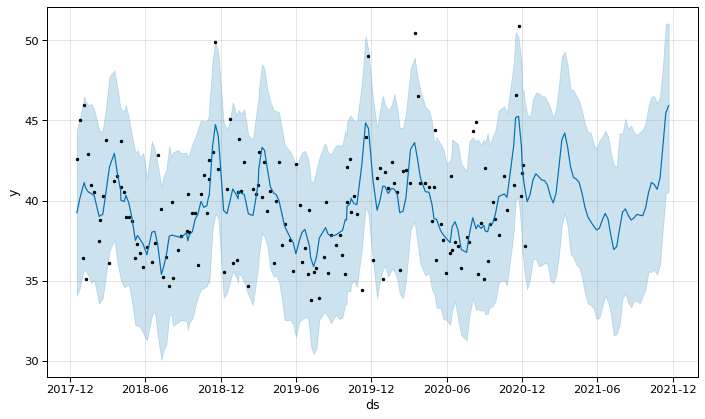

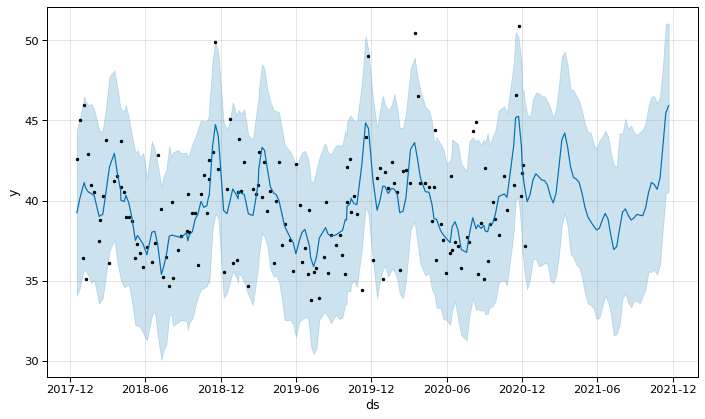

In [83]:
from fbprophet import Prophet
m1 = Prophet(interval_width=0.95)
m1.fit(ts_df2)
future1 = m1.make_future_dataframe(periods = 50,freq='W')
forecast1 = m1.predict(future1)
#We are plotting the forecast for next few weeks 
m1.plot(forecast1)

In [84]:
# summarize the forecast
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50))

            ds       yhat  yhat_lower  yhat_upper
156 2020-12-13  39.935675   34.481540   45.380593
157 2020-12-20  40.369996   35.118608   45.210092
158 2020-12-27  41.290977   36.353082   46.322248
159 2021-01-03  41.676429   36.366928   46.714681
160 2021-01-10  41.489652   35.909768   46.698009
161 2021-01-17  41.288711   35.966347   46.505163
162 2021-01-24  41.249343   36.101698   46.502128
163 2021-01-31  40.979927   36.064809   46.184417
164 2021-02-07  40.306906   35.041311   45.802633
165 2021-02-14  39.849865   34.857093   45.145381
166 2021-02-21  40.463473   35.307894   45.736096
167 2021-02-28  42.143190   36.610503   47.194591
168 2021-03-07  43.786299   38.484196   49.008725
169 2021-03-14  44.216674   39.210508   49.288674
170 2021-03-21  43.339012   38.382797   48.436173
171 2021-03-28  42.114901   36.705640   46.955418
172 2021-04-04  41.453332   36.461113   46.873250
173 2021-04-11  41.340502   36.014425   46.548723
174 2021-04-18  41.126683   35.841500   46.209979


Below we can see the trends with respect to year and months in the year. The first graph represents an increasing trend as we progress in the years and the latter shows a fluctuating trend in the monthly frozen meals sales. For some months it is low while for some it is high. We can see January, March and November has highest sales. Overall, Tuesdays and Fridays have the highest sales in a week.



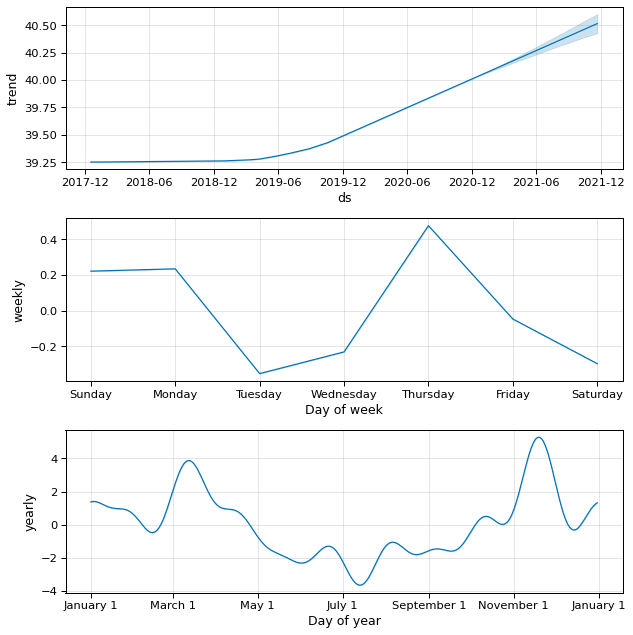

In [85]:
#Plots to find if there is any seasonality
fig1 = m1.plot_components(forecast1)